# Vis CNN

In this notebook, we will go through basics of Visualizing CNN.

Here we will use [fastai](https://github.com/fastai/fastai/  "fastai's Tutorial").

Hey yo, but how to see what CNN sees? 

Everything is explained in-detail in [blog post](https://dudeperf3ct.github.io/visualize/cnn/catsvsdogs/2018/12/02/Power-of-Visualizing-Convolution-Neural-Networks/). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/Vis%20CNN/vis_cnn_fastai.ipynb)

In [0]:
# import shutil 
# shutil.rmtree('data/catsvsdogs')

# Getting Data


The cats vs dogs dataset isn't available on keras library. You can download it from Kaggle however. Let's see how to do this by using the Kaggle API as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal.

In [0]:
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install --upgrade torch torchvision numpy

In [0]:
!pip install --upgrade kaggle scikit-plot

In [0]:
!pip install Pillow==5.3.0

    100% |████████████████████████████████| 2.0MB 16.2MB/s 
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1


This should print PIL version of 5.3.0 if not restart the runtime and run this cell again.

In [0]:
import PIL
print (PIL.PILLOW_VERSION)

5.3.0


In [0]:
#uncomment this once to upload kaggle.json

from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving kaggle.json to kaggle.json


In [0]:
#uncomment and run this once when you upload kaggle.json

! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p 'data/catsvsdogs'

In [0]:
path = 'data/catsvsdogs/'

! unzip -q -n {path}/train.zip -d {path}
! unzip -q -n {path}/test.zip -d {path}

train_path = 'data/catsvsdogs/train/'

In [0]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

In [0]:
# # After executing the cell above, Drive
# # files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive/Colab Notebooks"

In [0]:
# !cp "/content/drive/My Drive/Colab Notebooks/352.pth" "data/catsvsdogs/models/352.pth"
# !cp "/content/drive/My Drive/Colab Notebooks/export.pkl" "data/catsvsdogs/export.pkl"

## Fast AI

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *

## Visualization of one example

Enough talk, show me the cats!!!



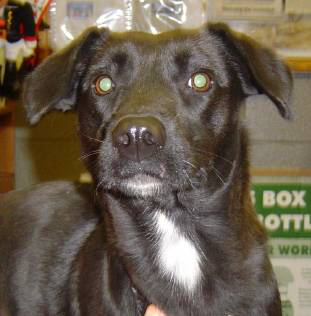

In [0]:
fn = 'data/catsvsdogs/train/dog.2818.jpg'
x = open_image(fn)
x

In [0]:
path = Path('data/catsvsdogs')
learn = load_learner(path)

In [0]:
data = learn.data

In [0]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [0]:
learn.model

In [0]:
y = learn.predict(x)
y

(Category dogs, tensor(1), tensor([0.0023, 0.9977]))

## Heatmap

In [0]:
m = learn.model.eval()

In [0]:
def hooked_backward(cat=y[1]):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [0]:
hook_a,hook_g = hooked_backward()

In [0]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [0]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [0]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma')

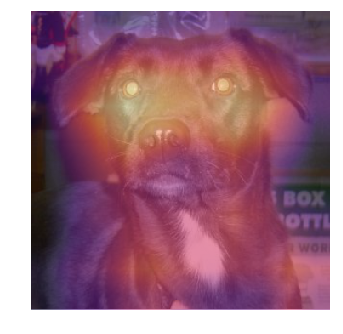

In [0]:
show_heatmap(avg_acts)

## Grad CAM

In [0]:
grad = hook_g.stored[0][0].cpu()
grad_chan = grad.mean(1).mean(1)
grad.shape,grad_chan.shape

(torch.Size([512, 11, 11]), torch.Size([512]))

In [0]:
mult = (acts*grad_chan[...,None,None]).mean(0)

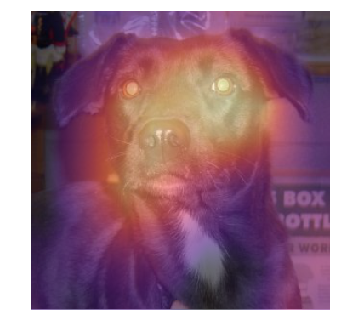

In [0]:
show_heatmap(mult)